# Linear regression

## Preparación

### Importación de librerías

In [1]:
import numpy as np # linear algebra
import pandas as pd  # data management (dataframes)
import matplotlib.pyplot as plt
import seaborn as sns  # plotting

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#from sklearn import metrics
#from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.inspection import permutation_importance

# stacking
from sklearn.ensemble import VotingRegressor, StackingRegressor

from sklearn.linear_model  import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer

#from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# others
from mltools import classification_tools as CT
from mltools import model_tools as MT

In [2]:
### Load libraries ###

# interactive plotting
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


# Data management libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Machine learning libraries
import math
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer

from sklearn import set_config
set_config(display='diagram')

# others
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mltools import regression_tools as RT
from mltools.regression_tools import LinearRegressor
from mltools import model_tools as MT

### Carga de datos

In [3]:
# Load file with the dataset with irradiance data
df_irradiance = pd.read_csv('./data/G04A_DATOS_IRRAD.csv', sep = ",")
df_irradiance.head()

,FECHA,IRRADH00,IRRADH03,IRRADH06,IRRADH09,IRRADH12,IRRADH15,IRRADH18,IRRADH21,ANNO,MES,DIA,DIASEM
0,2015-01-01,0.0,0.0,0.0,589813.00,1294089.50,468098.47,0.0,0.0,2015,1,1,3
1,2015-01-02,0.0,0.0,0.0,438244.75,989406.00,272884.66,0.0,0.0,2015,1,2,4
2,2015-01-03,0.0,0.0,0.0,543215.75,1162550.80,359685.12,0.0,0.0,2015,1,3,5
3,2015-01-04,0.0,0.0,0.0,504131.56,1229353.20,460497.50,0.0,0.0,2015,1,4,6
4,2015-01-05,0.0,0.0,0.0,502349.70,1012553.75,391783.16,0.0,0.0,2015,1,5,0


In [4]:
### Load file for the solar power utilization
df_util = pd.read_csv('./data/G04A_DATOS_UTIL.csv', sep = ",")
df_util.head()

,FECHA,UTILH00,UTILH03,UTILH06,UTILH09,UTILH12,UTILH15,UTILH18,UTILH21,ANNO,MES,DIA,DIASEM
0,2015-01-01,0.000023,0.000008,0.053105,0.590946,0.615057,0.091254,0.000008,0.000019,2015,1,1,3
1,2015-01-02,0.000012,0.000004,0.048031,0.397291,0.396714,0.048448,0.000000,0.000008,2015,1,2,4
2,2015-01-03,0.000008,0.000000,0.049542,0.557435,0.604719,0.091748,0.000004,0.000004,2015,1,3,5
3,2015-01-04,0.000008,0.000000,0.014918,0.375060,0.547907,0.090296,0.000016,0.000023,2015,1,4,6
4,2015-01-05,0.000008,0.000008,0.016370,0.167025,0.246309,0.051614,0.000004,0.000000,2015,1,5,0


In [5]:
df_aux = pd.merge(df_irradiance, df_util, on='FECHA')
df_aux

,FECHA,IRRADH00,IRRADH03,IRRADH06,IRRADH09,IRRADH12,IRRADH15,IRRADH18,IRRADH21,ANNO_x,...,UTILH06,UTILH09,UTILH12,UTILH15,UTILH18,UTILH21,ANNO_y,MES_y,DIA_y,DIASEM_y
0,2015-01-01,0.0,0.0,0.0,589813.00,1294089.50,468098.470,0.0,0.0,2015,...,0.053105,0.590946,0.615057,0.091254,0.000008,0.000019,2015,1,1,3
1,2015-01-02,0.0,0.0,0.0,438244.75,989406.00,272884.660,0.0,0.0,2015,...,0.048031,0.397291,0.396714,0.048448,0.000000,0.000008,2015,1,2,4
2,2015-01-03,0.0,0.0,0.0,543215.75,1162550.80,359685.120,0.0,0.0,2015,...,0.049542,0.557435,0.604719,0.091748,0.000004,0.000004,2015,1,3,5
3,2015-01-04,0.0,0.0,0.0,504131.56,1229353.20,460497.500,0.0,0.0,2015,...,0.014918,0.375060,0.547907,0.090296,0.000016,0.000023,2015,1,4,6
4,2015-01-05,0.0,0.0,0.0,502349.70,1012553.75,391783.160,0.0,0.0,2015,...,0.016370,0.167025,0.246309,0.051614,0.000004,0.000000,2015,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2020-12-27,0.0,0.0,0.0,176437.95,596362.94,213554.200,0.0,0.0,2020,...,0.012102,0.068252,0.070849,0.012841,0.000003,0.000003,2020,12,27,6
2188,2020-12-28,0.0,0.0,0.0,573497.50,1097877.50,269206.560,0.0,0.0,2020,...,0.032334,0.334919,0.285503,0.046018,0.000003,0.000007,2020,12,28,0
2189,2020-12-29,0.0,0.0,0.0,425860.56,801252.40,237152.560,0.0,0.0,2020,...,0.023633,0.245105,0.282372,0.017419,0.000007,0.000007,2020,12,29,1
2190,2020-12-30,0.0,0.0,0.0,214860.45,321715.56,29951.986,0.0,0.0,2020,...,0.010654,0.134742,0.076885,0.005577,0.000010,0.000000,2020,12,30,2


In [6]:
# Lista de identificadores comunes
id_vars = ['FECHA', 'ANNO_x', 'MES_x', 'DIA_x', 'DIASEM_x']

# Melt para irradiancia
irrad_melt = pd.melt(df_aux, id_vars=id_vars, value_vars=['IRRADH00', 'IRRADH03', 'IRRADH06', 'IRRADH09', 'IRRADH12', 'IRRADH15', 'IRRADH18', 'IRRADH21'], var_name='HOUR', value_name='IRRAD_VALUE')

# Melt para utilidad
util_melt = pd.melt(df_aux, id_vars=id_vars, value_vars=['UTILH00', 'UTILH03', 'UTILH06', 'UTILH09', 'UTILH12', 'UTILH15', 'UTILH18', 'UTILH21'], var_name='HOUR', value_name='UTIL_VALUE')

# Ajustar las columnas 'HOUR' para que coincidan y permitan un merge adecuado
irrad_melt['HOUR'] = irrad_melt['HOUR'].str.extract('(\d+)')
util_melt['HOUR'] = util_melt['HOUR'].str.extract('(\d+)')

# Realizar un merge de los DataFrames basado en las columnas comunes, incluida la 'HOUR'
df = pd.merge(irrad_melt, util_melt, on=id_vars + ['HOUR'])

df['FECHA'] = pd.to_datetime(df['FECHA'])

df['HOUR'] = df['HOUR'].astype(int)

df = df.drop(['DIASEM_x'], axis=1)
# Crea la nueva columna 'dia_mes' extrayendo el día del año
df['dia_mes'] = df['FECHA'].dt.dayofyear

df = df.drop(['FECHA'], axis=1)

df

,ANNO_x,MES_x,DIA_x,HOUR,IRRAD_VALUE,UTIL_VALUE,dia_mes
0,2015,1,1,0,0.0,0.000023,1
1,2015,1,2,0,0.0,0.000012,2
2,2015,1,3,0,0.0,0.000008,3
3,2015,1,4,0,0.0,0.000008,4
4,2015,1,5,0,0.0,0.000008,5
...,...,...,...,...,...,...,...
17531,2020,12,27,21,0.0,0.000003,362
17532,2020,12,28,21,0.0,0.000007,363
17533,2020,12,29,21,0.0,0.000007,364
17534,2020,12,30,21,0.0,0.000000,365


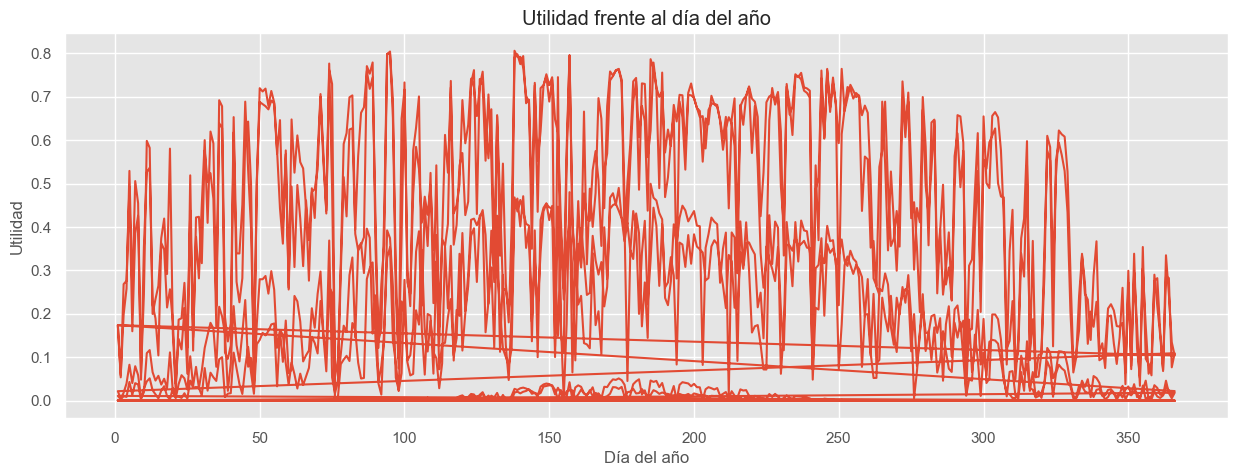

In [19]:
df_2015 = df[df['ANNO_x'] == 2020]

# Sacamos una gráfica de UTIL_VALUE frente a dia_mes
plt.figure(figsize=(15, 5))
plt.plot(df_2015['dia_mes'], df_2015['UTIL_VALUE'])
plt.xlabel('Día del año')
plt.ylabel('Utilidad')
plt.title('Utilidad frente al día del año')
plt.show()

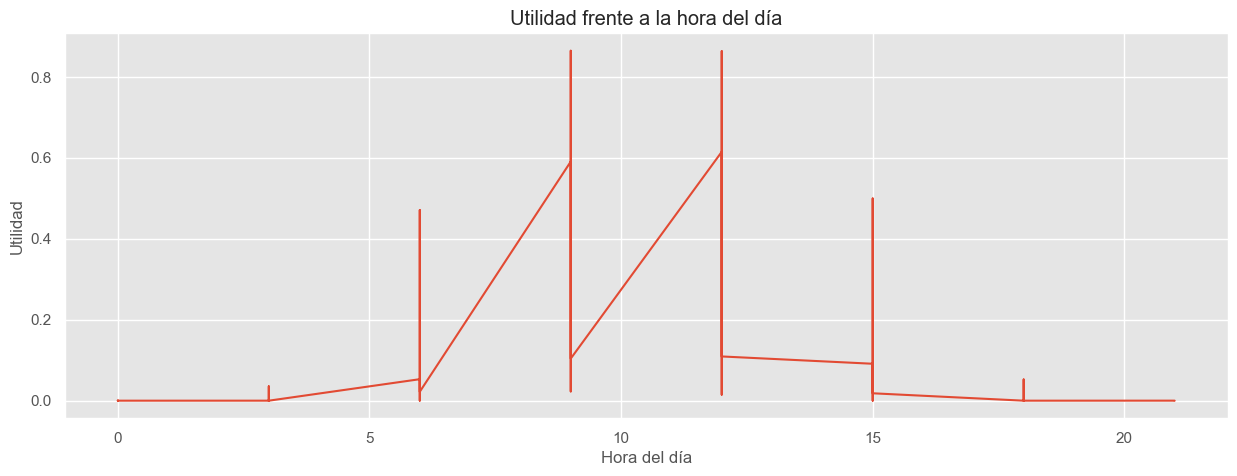

In [21]:
# Sacamos una gráfica de UTIL_VALUE frente a HOUR
plt.figure(figsize=(15, 5))
plt.plot(df['HOUR'], df['UTIL_VALUE'])
plt.xlabel('Hora del día')
plt.ylabel('Utilidad')
plt.title('Utilidad frente a la hora del día')
plt.show()

### Dividir en train y test

In [7]:
OUTPUT = 'UTIL_VALUE'
X = df.drop(columns=[OUTPUT])
y = df[OUTPUT]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  #percentage of test data
                                                    random_state=0) #seed for replication

## Modelos

### Linear Regression

In [73]:
INPUTS_LR_NUM = ["dia_mes","IRRAD_VALUE"]
INPUTS_LR_CAT = ["HOUR"]
INPUTS_LR = INPUTS_LR_NUM + INPUTS_LR_CAT

# Prepare the numeric variables by imputing by scaling
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Prepare the categorical variables by encoding the categories
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore',drop='first'))])

# Create a preprocessor to perform the steps defined above
preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, INPUTS_LR_NUM),
        ('cat', categorical_transformer, INPUTS_LR_CAT)
        ])

pipe = Pipeline(steps=[('Prep',preprocessor), # Preprocess the variables when training the model 
                        ('LinReg',LinearRegressor())]) 


# We use Grid Search Cross Validation to find the best parameter for the model in the grid defined 
nFolds = 10
param = {'LinReg__fit_intercept': [True, False],
         'LinReg__normalize': [True, False]}
LR_fit = GridSearchCV(estimator=pipe, # Structure of the model to use
                        param_grid=param, # Defined grid to search in
                        n_jobs=-1, # Number of cores to use (parallelize)
                        cv=nFolds) # Number of Folds 
LR_fit.fit(X_train[INPUTS_LR], y_train) # Search in grid

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['dia_mes',
                                                                          'IRRAD_VALUE']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['HOUR'])])),
                                       ('LinReg', LinearRegressor())]),
             n_jobs=-1,
             param_grid={'LinReg__fit_intercept': [True, False],
                         'LinReg__normalize': [True, False]})

In [66]:
LR_fit.best_estimator_['LinReg'].summary(LR_fit.best_estimator_['Prep'].get_feature_names_out())

                            OLS Regression Results                            
Dep. Variable:             UTIL_VALUE   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.487e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:04:44   Log-Likelihood:                 16381.
No. Observations:               14028   AIC:                        -3.274e+04
Df Residuals:                   14018   BIC:                        -3.267e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
var                       coef            std err         t               P>|t|          
---------------------------------------------------------------------------
num__dia_mes              0.128           0.

In [67]:
dfTR_eval = X_train.copy()
dfTR_eval['charges'] = y_train
dfTS_eval = X_test.copy()
dfTS_eval['charges'] = y_test

In [68]:
dfTR_eval['LR_pred'] = LR_fit.predict(X_train)
dfTS_eval['LR_pred'] = LR_fit.predict(X_test)

In [69]:
#Training and test MAE - Mean Absolute error
print('Training MAE:',mean_absolute_error(dfTR_eval['charges'], dfTR_eval['LR_pred']))
print('Test MAE:',mean_absolute_error(dfTS_eval['charges'], dfTS_eval['LR_pred']))

Training MAE: 0.04443701124946215
Test MAE: 0.04612226346827418


In [70]:
#Training and test RMSE - Root Mean Square Error
print('Training RMSE:',math.sqrt(mean_squared_error(dfTR_eval['charges'], dfTR_eval['LR_pred'])))
print('Test RMSE:',math.sqrt(mean_squared_error(dfTS_eval['charges'], dfTS_eval['LR_pred'])))

Training RMSE: 0.07527194299203145
Test RMSE: 0.07635744933388579


In [71]:
#Training and test r^2 
print('Training R2:',r2_score(dfTR_eval['charges'], dfTR_eval['LR_pred']))
print('Test R2:',r2_score(dfTS_eval['charges'], dfTS_eval['LR_pred']))

Training R2: 0.9051819030068604
Test R2: 0.9044024449895861


### Stacking

In [95]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

INPUTS_LR_NUM = ["dia_mes","IRRAD_VALUE"]
INPUTS_LR_CAT = ["HOUR"]
INPUTS_LR = INPUTS_LR_NUM + INPUTS_LR_CAT

# Prepare the numeric variables by imputing by scaling
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Prepare the categorical variables by encoding the categories
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore',drop='first'))])

# Create a preprocessor to perform the steps defined above
preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, INPUTS_LR_NUM),
        ('cat', categorical_transformer, INPUTS_LR_CAT)
        ])

estimators = [
    ('lr', make_pipeline(preprocessor, # Preprocess the variables when training the model 
                        LinearRegression())

    ),
    ('mlp', make_pipeline(preprocessor, # Preprocess the variables when training the model 
                        MLPRegressor(solver='lbfgs', # Update function
                activation='logistic', # Logistic sigmoid activation function
                max_iter=450, # Maximum number of iterations
                tol=1e-4, # Tolerance for the optimization
                random_state=150,
                verbose = True,
                alpha=0.0001,
                hidden_layer_sizes=(5,))) # Number of neurons in each layer

    ),
    ('rt',make_pipeline(preprocessor, # Preprocess the variables when training the model 
                        DecisionTreeRegressor(criterion='squared_error',  # impurity measure
                                                            min_impurity_decrease=0.0, # Minimum entropy to decrease in each split
                                                            min_samples_leaf=5, # Minimum number of obs in a terminal node
                                                            min_samples_split=2, # Minimum number of obs in node to keep cutting
                                                            random_state=150))

    )
]

estimators

[('lr',
  Pipeline(steps=[('columntransformer',
                   ColumnTransformer(transformers=[('num',
                                                    Pipeline(steps=[('scaler',
                                                                     StandardScaler())]),
                                                    ['dia_mes', 'IRRAD_VALUE']),
                                                   ('cat',
                                                    Pipeline(steps=[('onehot',
                                                                     OneHotEncoder(drop='first',
                                                                                   handle_unknown='ignore'))]),
                                                    ['HOUR'])])),
                  ('linearregression', LinearRegression())])),
 ('mlp',
  Pipeline(steps=[('columntransformer',
                   ColumnTransformer(transformers=[('num',
                                                    Pipelin

In [96]:
weights = [0.2, 0.7, 0.1]
stacked_reg = VotingRegressor(estimators = estimators, weights = weights)
stacked_reg = stacked_reg.fit(X_train[INPUTS_LR], y_train)
stacked_reg.get_params()

{'estimators': [('lr',
   Pipeline(steps=[('columntransformer',
                    ColumnTransformer(transformers=[('num',
                                                     Pipeline(steps=[('scaler',
                                                                      StandardScaler())]),
                                                     ['dia_mes', 'IRRAD_VALUE']),
                                                    ('cat',
                                                     Pipeline(steps=[('onehot',
                                                                      OneHotEncoder(drop='first',
                                                                                    handle_unknown='ignore'))]),
                                                     ['HOUR'])])),
                   ('linearregression', LinearRegression())])),
  ('mlp',
   Pipeline(steps=[('columntransformer',
                    ColumnTransformer(transformers=[('num',
                              

In [83]:
# estimations using the stacked models
y_train_stack = stacked_reg.predict(X_train[INPUTS_LR])
y_test_stack = stacked_reg.predict(X_test[INPUTS_LR])

# errors
mse_tr_stack = mean_squared_error(y_train_stack, y_train)
mse_ts_stack = mean_squared_error(y_test_stack, y_test)

rmse_tr_stack = math.sqrt(mean_squared_error(y_train_stack, y_train))
rmse_ts_stack = math.sqrt(mean_squared_error(y_test_stack, y_test))

mae_tr_stack = mean_absolute_error(y_train_stack, y_train)
mae_ts_stack = mean_absolute_error(y_test_stack, y_test)

r2_tr_stack = r2_score(y_train_stack, y_train)
r2_ts_stack = r2_score(y_test_stack, y_test)

print(f'MSE(TR, stack) = {mse_tr_stack}')
print(f'RMSE(TR, stack) = {rmse_tr_stack}')
print(f'R2(TR, stack) = {r2_tr_stack}')
print(f'MAE(TR, stack) = {mae_tr_stack}')

print(f'MSE(TS, stack) = {mse_ts_stack}')
print(f'RMSE(TS, stack) = {rmse_ts_stack}')
print(f'R2(TS, stack) = {r2_ts_stack}')
print(f'MAE(TS, stack) = {mae_ts_stack}')

MSE(TR, stack) = 0.005868425049183464
RMSE(TR, stack) = 0.07660564632703952
R2(TR, stack) = 0.8668114590609445
MAE(TR, stack) = 0.050803259046974886
MSE(TS, stack) = 0.006076295271141798
RMSE(TS, stack) = 0.07795059506598906
R2(TS, stack) = 0.8636716989049918
MAE(TS, stack) = 0.05216202298124853


In [97]:
stacked_genreg = StackingRegressor(
    estimators = estimators,
    # final_estimator=RandomForestRegressor(n_estimators=20, random_state=999)
    final_estimator = LinearRegression()
)

stacked_genreg = stacked_genreg.fit(X_train[INPUTS_LR], y_train)
stacked_genreg

StackingRegressor(estimators=[('lr',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('num',
                                                                                 Pipeline(steps=[('scaler',
                                                                                                  StandardScaler())]),
                                                                                 ['dia_mes',
                                                                                  'IRRAD_VALUE']),
                                                                                ('cat',
                                                                                 Pipeline(steps=[('onehot',
                                                                                                  OneHotEncoder(drop='first',
                                                                                                                handle_unknown='ignore'))]),
                                                                                 ['HOUR'])])),
                                               ('linearregression',
                                                LinearRegression())])),
                              ('mlp',
                               Pipeline(steps...
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('num',
                                                                                 Pipeline(steps=[('scaler',
                                                                                                  StandardScaler())]),
                                                                                 ['dia_mes',
                                                                                  'IRRAD_VALUE']),
                                                                                ('cat',
                                                                                 Pipeline(steps=[('onehot',
                                                                                                  OneHotEncoder(drop='first',
                                                                                                                handle_unknown='ignore'))]),
                                                                                 ['HOUR'])])),
                                               ('decisiontreeregressor',
                                                DecisionTreeRegressor(min_samples_leaf=5,
                                                                      random_state=150))]))],
                  final_estimator=LinearRegression())

In [98]:
# estimations using the stacked models
y_train_stack = stacked_genreg.predict(X_train[INPUTS_LR])
y_test_stack = stacked_genreg.predict(X_test[INPUTS_LR])

# errors
mse_tr_stack = mean_squared_error(y_train_stack, y_train)
mse_ts_stack = mean_squared_error(y_test_stack, y_test)

rmse_tr_stack = math.sqrt(mean_squared_error(y_train_stack, y_train))
rmse_ts_stack = math.sqrt(mean_squared_error(y_test_stack, y_test))

mae_tr_stack = mean_absolute_error(y_train_stack, y_train)
mae_ts_stack = mean_absolute_error(y_test_stack, y_test)

r2_tr_stack = r2_score(y_train_stack, y_train)
r2_ts_stack = r2_score(y_test_stack, y_test)

print(f'MSE(TR, stack) = {mse_tr_stack}')
print(f'RMSE(TR, stack) = {rmse_tr_stack}')
print(f'R2(TR, stack) = {r2_tr_stack}')
print(f'MAE(TR, stack) = {mae_tr_stack}')

print(f'MSE(TS, stack) = {mse_ts_stack}')
print(f'RMSE(TS, stack) = {rmse_ts_stack}')
print(f'R2(TS, stack) = {r2_ts_stack}')
print(f'MAE(TS, stack) = {mae_ts_stack}')

MSE(TR, stack) = 0.0028739423482361227
RMSE(TR, stack) = 0.05360916291303309
R2(TR, stack) = 0.9482666581469102
MAE(TR, stack) = 0.029756555525116208
MSE(TS, stack) = 0.004489678049284638
RMSE(TS, stack) = 0.0670050598782259
R2(TS, stack) = 0.9203555797732
MAE(TS, stack) = 0.03710038139881317


In [99]:
print(stacked_genreg.final_estimator_.intercept_)
print(stacked_genreg.final_estimator_.coef_)

8.008792259650566e-07
[-0.06126891  0.53619556  0.52636088]


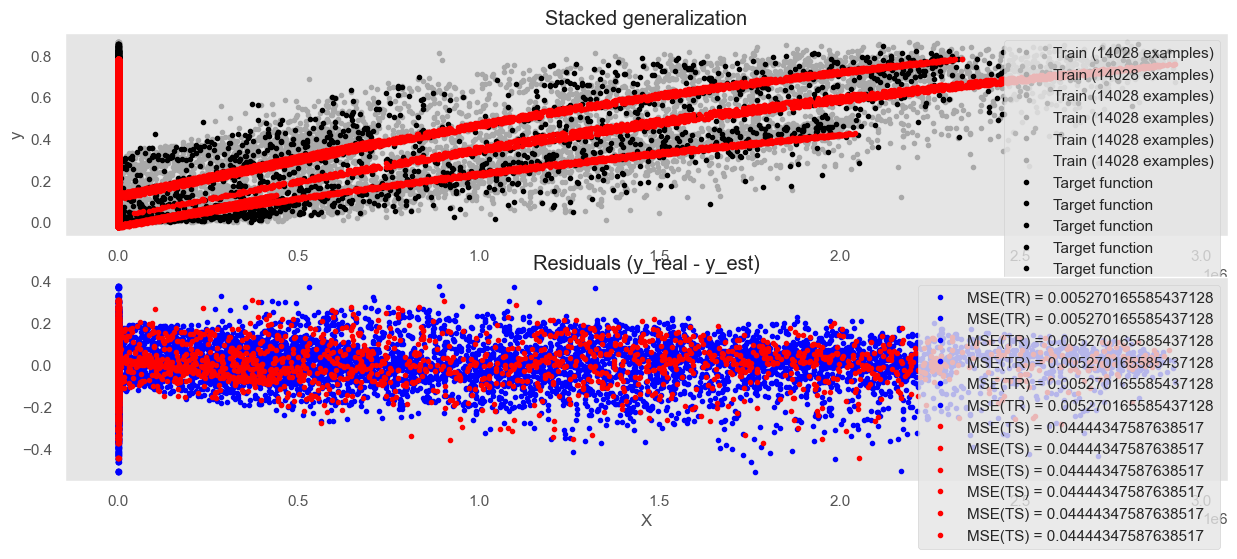

In [93]:
# Plot data
plt.figure(figsize=(15, 9))
ax1 = plt.subplot(3,1,1)
plt.plot(X_train,y_train,'.', color='darkgray', label=f'Train ({len(X_train)} examples)')
plt.plot(X_test, y_test, '.', color = 'black', linewidth=2, label='Target function')
plt.plot(X_train, y_train_stack, '.', color = 'red', linewidth=2, label='Gen. Stacking')
plt.grid()
plt.legend()
plt.title('Stacked generalization')
plt.ylabel('y')

# plot residuals
plt.subplot(3,1,2, sharex = ax1)
plt.plot(X_train, y_train - y_train_stack, '.', color = 'blue', label=f'MSE(TR) = {mse_tr_stack}')
plt.plot(X_test, y_test - y_test_stack, '.', color = 'red', label=f'MSE(TS) = {mae_ts_stack}')
plt.title(f'Residuals (y_real - y_est)')
plt.legend()
plt.grid()
plt.xlabel('X')
plt.show()